In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#salary vs birthplace - CG - Done
#salary vs pts per game - CG - Done
#salary vs NHL GWG - CB - Done
#salary vs Age - CB - Done
#salary vs Penalties - JW - Done
#salary vs overall draft - JW - Done

In [3]:
#read in the csv database 
nhl_df = pd.read_csv("nhlstats.csv", encoding='ISO-8859-1',error_bad_lines=False)

In [4]:
#Display dimension of our dataframe
nhl_df = pd.DataFrame(nhl_df)
nhl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Columns: 168 entries, Player Id to Cap Hit
dtypes: float64(67), int64(75), object(26)
memory usage: 1.1+ MB


In [5]:
### Run a correlation analysis to identify which measures are related
nhl_corr = nhl_df.corr()
nhl_corr.info()
nhl_corr.head()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, Player Id to Cap Hit
Columns: 142 entries, Player Id to Cap Hit
dtypes: float64(142)
memory usage: 158.6+ KB


,Player Id,Year Born,Age,NHL Ht,NHL Wt,NHL DftYr,NHL DftRd,NHL Ovrl,GP,Goals,...,DAP,DL GS,DL GS/G,Game Stars 1st,2nd,3rd,TC MGL,TC CHIP,Salary,Cap Hit
Player Id,1.000000,0.923177,-0.918861,-0.047213,-0.216993,0.979002,-0.108819,-0.118058,-0.323375,-0.167995,...,0.018009,-0.196078,-0.129417,-0.021553,-0.077091,0.008523,-0.066471,-0.246190,-0.470663,-0.488039
Year Born,0.923177,1.000000,-0.997893,0.022030,-0.159206,0.989494,-0.186099,-0.195961,-0.300333,-0.118334,...,-0.014268,-0.142717,-0.071385,0.024824,-0.031848,0.052021,-0.071356,-0.228259,-0.432352,-0.450084
Age,-0.918861,-0.997893,1.000000,-0.021443,0.159004,-0.986621,0.182031,0.191396,0.302580,0.122141,...,0.017667,0.146583,0.075133,-0.023120,0.036931,-0.047259,0.069012,0.224858,0.434848,0.453183
NHL Ht,-0.047213,0.022030,-0.021443,1.000000,0.720449,-0.004421,-0.190033,-0.193056,0.070231,-0.044073,...,-0.041618,-0.023137,-0.056419,-0.045638,-0.029980,-0.001909,0.005655,0.046570,0.067713,0.077852
NHL Wt,-0.216993,-0.159206,0.159004,0.720449,1.000000,-0.176797,-0.112235,-0.120985,0.126035,-0.014976,...,0.053921,0.011999,-0.027720,-0.048448,-0.056698,-0.001042,0.042737,0.054047,0.157932,0.161160


In [6]:
# Only keep variables with Abs(Correlations) > 0.50
#nhl_corr_high = nhl_corr[(abs(nhl_corr) > 0.50).all(axis=1)]
#nhl_corr_high.info()
#nhl_corr.head()

In [7]:
### Loop through Rows x Columns;
### Find indexes

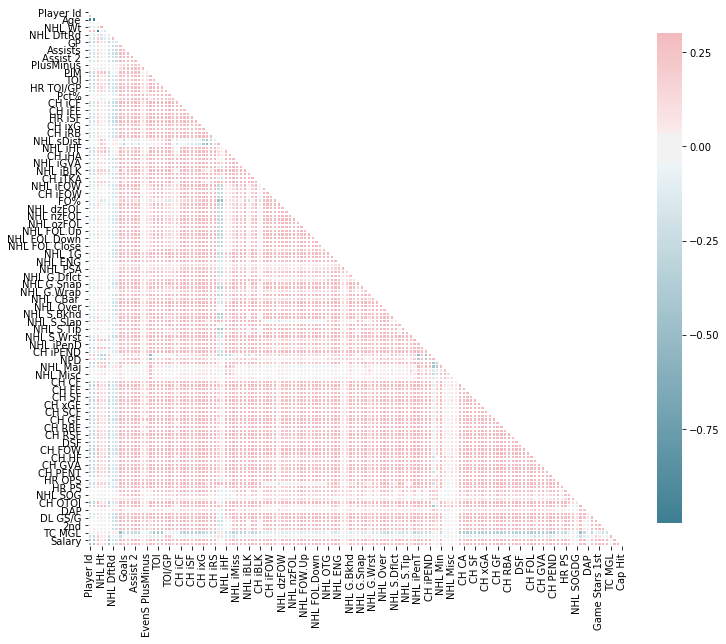

In [8]:
# Generate a mask for the upper triangle
mask = np.zeros_like(nhl_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(nhl_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [9]:
#remove RFA players
ufa_df = nhl_df.loc[nhl_df["Status"] == "UFA"]

In [10]:
#drop NaN's
ufa_df = ufa_df[ufa_df['Status'].notnull()]
len(ufa_df)

474

In [11]:
ufa_df.head()

,Player Id,Year Born,Age,NHL City,Pr/St,Nationality,NHL Nat,NHL Ht,NHL Wt,NHL DftYr,...,Game Stars 1st,2nd,3rd,TC MGL,TC Injuries,TC CHIP,CF NMC,Status,Salary,Cap Hit
0,8476805,32263,29,Hamilton,ON,CAN,CAN,69,170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UFA,575000,575000
1,8471716,31833,30,Muskegon,MI,USA,USA,74,218,2005.0,...,0.0,0.0,1.0,18.0,"Lower body, Knee",932926.83,NTC,UFA,5500000,4250000
4,8475844,33724,25,Morristown,NJ,USA,USA,72,202,2010.0,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,UFA,625000,625000
6,8473991,32410,29,Burnaby,BC,CAN,CAN,75,219,2007.0,...,1.0,0.0,3.0,NaN,NaN,NaN,M-NTC,UFA,2800000,2800000
11,8473573,32287,29,Yaroslavl,NaN,RUS,RUS,76,198,2006.0,...,2.0,4.0,2.0,18.0,"Upper body, Lower body",998780.49,NMC,UFA,5750000,4550000


In [12]:
ufa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 871
Columns: 168 entries, Player Id to Cap Hit
dtypes: float64(67), int64(75), object(26)
memory usage: 625.8+ KB


In [13]:
#### Salary vs. Birthplace ####
#Calculate number of players per country and display, so to find out how many players are in each country
ufa_df["Nationality"].value_counts()

CAN    241
USA    132
SWE     38
CZE     16
RUS     11
FIN      9
DNK      5
SVK      5
CHE      4
AUT      3
FRA      2
NOR      2
DEU      2
ITA      1
HRV      1
EST      1
SVN      1
Name: Nationality, dtype: int64

In [14]:
country_count = pd.DataFrame(ufa_df['Nationality'].value_counts()).reset_index()
country_count.rename(columns = {"index":"Nationality","Nationality":"Countryman"}, inplace = True)

In [15]:
ufa_df = pd.merge(ufa_df, country_count, on="Nationality")
ufa_df.head()

,Player Id,Year Born,Age,NHL City,Pr/St,Nationality,NHL Nat,NHL Ht,NHL Wt,NHL DftYr,...,2nd,3rd,TC MGL,TC Injuries,TC CHIP,CF NMC,Status,Salary,Cap Hit,Countryman
0,8476805,32263,29,Hamilton,ON,CAN,CAN,69,170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,UFA,575000,575000,241
1,8473991,32410,29,Burnaby,BC,CAN,CAN,75,219,2007.0,...,0.0,3.0,NaN,NaN,NaN,M-NTC,UFA,2800000,2800000,241
2,8474573,32783,28,Bowmanville,ON,CAN,CAN,73,210,2008.0,...,3.0,1.0,NaN,NaN,NaN,NaN,UFA,3700000,3300000,241
3,8474717,32955,27,Montreal,QC,CAN,CAN,73,207,2008.0,...,1.0,0.0,NaN,NaN,NaN,NaN,UFA,800000,750000,241
4,8475197,33445,26,Victoria,BC,CAN,CAN,70,190,2009.0,...,1.0,1.0,8.0,Lower body,536585.37,NaN,UFA,5000000,5500000,241


In [16]:
ufa_df["Country Code"] = ufa_df["Nationality"]

In [17]:
#Normalize data by divding the DSA stat by TOI (Time On Ice)
ufa_df["DSA/TOI"] = ufa_df["DSA"]/ufa_df["TOI"]

In [18]:
ufa_df.head()

,Player Id,Year Born,Age,NHL City,Pr/St,Nationality,NHL Nat,NHL Ht,NHL Wt,NHL DftYr,...,TC MGL,TC Injuries,TC CHIP,CF NMC,Status,Salary,Cap Hit,Countryman,Country Code,DSA/TOI
0,8476805,32263,29,Hamilton,ON,CAN,CAN,69,170,NaN,...,NaN,NaN,NaN,NaN,UFA,575000,575000,241,CAN,0.116686
1,8473991,32410,29,Burnaby,BC,CAN,CAN,75,219,2007.0,...,NaN,NaN,NaN,M-NTC,UFA,2800000,2800000,241,CAN,8.801214
2,8474573,32783,28,Bowmanville,ON,CAN,CAN,73,210,2008.0,...,NaN,NaN,NaN,NaN,UFA,3700000,3300000,241,CAN,4.520697
3,8474717,32955,27,Montreal,QC,CAN,CAN,73,207,2008.0,...,NaN,NaN,NaN,NaN,UFA,800000,750000,241,CAN,4.989035
4,8475197,33445,26,Victoria,BC,CAN,CAN,70,190,2009.0,...,8.0,Lower body,536585.37,NaN,UFA,5000000,5500000,241,CAN,4.338488


In [19]:
#If country is represented by less than or equal to 5 players, then give it a Country Code of "OTH"
ufa_df.loc[ufa_df['Countryman'] <= 5, 'Country Code'] = "OTH"

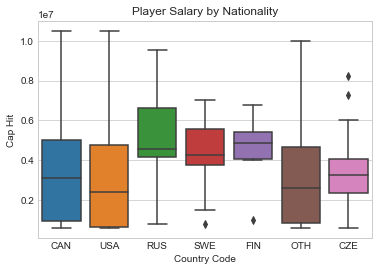

In [20]:
#Display chart (Salary to Country)
sns.set_style("whitegrid")
chart1 = sns.boxplot(x = "Country Code", y = "Cap Hit", data = ufa_df)
plt.title("Player Salary by Nationality")
plt.show()

In [21]:
#add column for points per game, calculate points per game, and fill cells with answer
ufa_df["Points per Game"] = round(ufa_df["Points"] / ufa_df["GP"],3)

In [22]:
ufa_df["Points per Game"].head()

0    0.000
1    0.159
2    0.683
3    0.217
4    0.514
Name: Points per Game, dtype: float64

In [23]:
ufa_df["FWD/DEF"] = ufa_df["Position"]

In [24]:
replace_position = {"D": "D",
                    "C": "F",
                    "RW": "F",
                    "LW": "F",
                    "C/LW": "F",
                    "LW/C": "F",
                    "C/RW": "F",
                    "RW/C": "F",
                    "LW/RW": "F",
                    "RW/LW": "F",
                    "C/LW/RW": "F",
                    "C/RW/LW": "F",
                    "LW/C/RW": "F",
                    "LW/RW/C": "F",
                    "RW/C/LW": "F",
                    "RW/LW/C": "F",
                    "D/RW": "D",
                    "RW/D": "D",
                    "D/LW": "D",
                    "LW/D": "D",
                    "C/D": "D",
                    "D/C": "D",
                    "C/LW/C":"F"}
ufa_df
ufa_df.loc[:,"FWD/DEF"] = ufa_df["FWD/DEF"].map(replace_position)

In [25]:
#confirm the above
ufa_df["FWD/DEF"].value_counts()

F    299
D    175
Name: FWD/DEF, dtype: int64

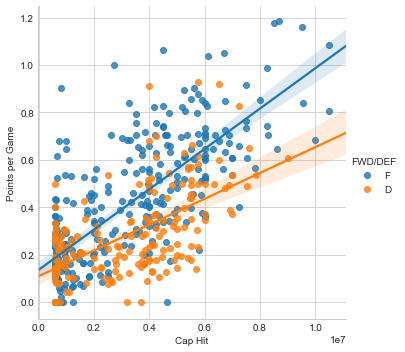

In [26]:
#If we want to look at this chart by team, then we need to drop the slashes "DAL/ANA" to 'ANA'
#Plot the scatterplot 
sns.lmplot(x = "Cap Hit", y = "Points per Game", data = ufa_df, hue="FWD/DEF", fit_reg=True)
plt.show()

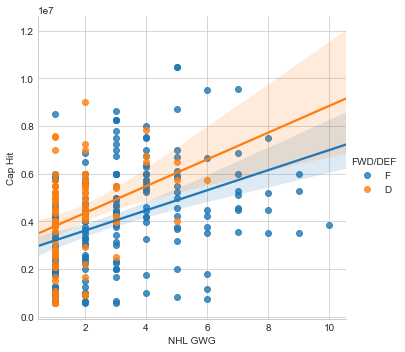

In [27]:
#Create scatterplot for game winning goals to salary

#duplicate the data set and filter out 0 GWG
gwg_df = ufa_df.loc[ufa_df["NHL GWG"] > 0]

#plot the data
sns.lmplot(x = "NHL GWG", y = "Cap Hit", data = gwg_df, hue="FWD/DEF")
plt.show()

#observable trend = Higher paid players seem to score more Game Winning Goals

In [28]:
#List all columns in our ufa_df dataframe
list(ufa_df)

['Player Id',
 'Year Born',
 'Age',
 'NHL City',
 'Pr/St',
 'Nationality',
 'NHL Nat',
 'NHL Ht',
 'NHL Wt',
 'NHL DftYr',
 'NHL DftRd',
 'NHL Ovrl',
 'NHL Hand',
 'Last Name',
 'First Name',
 'Position',
 'Team',
 'GP',
 'Goals',
 'Assists',
 'Assist 1',
 'Assist 2',
 'Points',
 'PlusMinus',
 'EvenS PlusMinus',
 'PIM',
 'Shifts',
 'TOI',
 'CH TOI',
 'HR TOI/GP',
 'TOI/GP',
 'TOI%',
 'IPP%',
 'SH%',
 'SV%',
 'PDO',
 'Focused on Goals F/60',
 'A/60',
 'Pct%',
 'Diff',
 'Diff/60',
 'CH iCF',
 'HR iCF',
 'CH iFF',
 'CH iSF',
 'HR iSF',
 'NHL iSF',
 'CH ixG',
 'CH iSCF',
 'CH iRB',
 'CH iRS',
 'iDS',
 'NHL sDist',
 'CH sDist',
 'RV Pass',
 'NHL iHF',
 'CH iHF',
 'CH iHA',
 'iHDf',
 'NHL iMiss',
 'NHL iGVA',
 'NHL iTKA',
 'NHL iBLK',
 'CH iGVA',
 'CH iTKA',
 'CH iBLK',
 'BLK%',
 'NHL iFOW',
 'NHL iFOL',
 'CH iFOW',
 'CH iFOL',
 'FO%',
 '%FOT',
 'NHL dzFOW',
 'NHL dzFOL',
 'NHL nzFOW',
 'NHL nzFOL',
 'NHL ozFOW',
 'NHL ozFOL',
 'NHL FOW.Up',
 'NHL FOL.Up',
 'NHL FOW.Down',
 'NHL FOL.Down',
 

In [29]:
#Create data frames to hold Defensive and Offensive players
ufa_fwd = ufa_df.loc[ufa_df["FWD/DEF"] == "F"]
ufa_def = ufa_df.loc[ufa_df["FWD/DEF"] == "D"]

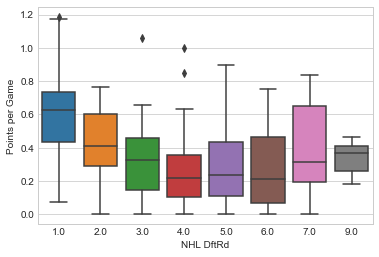

In [30]:
#Create a boxplot, for Forwards, showing Points Per Game vs. Draft Round
sns.boxplot(x = "NHL DftRd", y = "Points per Game", data = ufa_fwd)
plt.show()
#Observable trend = Higher drafted players produce more points per game, interesting to note the outliers and gems found
#in the latest rounds

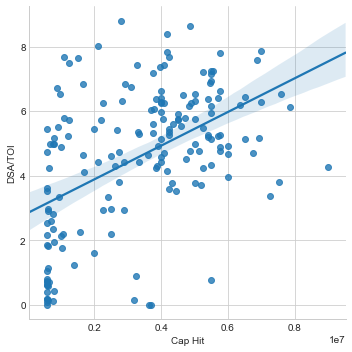

In [45]:
#Create a boxplot, for Defensemen, showing block vs. Draft Round
sns.lmplot(x = "Cap Hit", y = "DSA/TOI", data = ufa_def)
plt.show()
#Observable trend = Higher drafted players produce more points per game, interesting to note the outliers and gems found
#in the latest rounds
#DSA = Dangerous shots allowed while this player was on the ice, which is rebounds plus rush shots


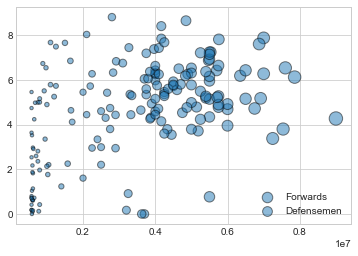

In [44]:

#Forwards vs. Defensemen - Goals For vs. Goals Against vs. Cap Hit
sns.set_style("whitegrid")

def_plot = plt.scatter(x = ufa_def["Cap Hit"], y = ufa_def["DSA/TOI"], s = ufa_def["Cap Hit"]/50000,
            cmap = "Reds", alpha = 0.5, edgecolors = "black", linewidth = 1, label = "Defensemen")

plt.figsize = (20, 15)

#Set X / Y Limits
#plt.xlim(0, max(max(ufa_df["CH GF"]), max(ufa_df["CH GA"])))
#plt.ylim(0, max(max(ufa_df["CH GF"]), max(ufa_df["CH GA"])))

# Add titles (main and on axis)
#plt.xlabel("Goals For")
#plt.ylabel("Goals Against")
#plt.title("Goals For vs. Goals Against; Bubble Size = Cap Hit")

#Create a legend
plt.legend(handles = [fwd_plot, def_plot], loc = 'best')

plt.show()


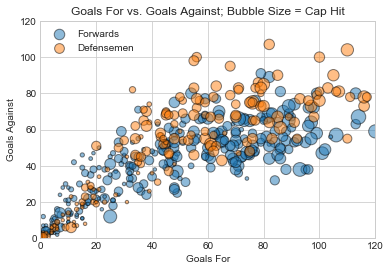

In [32]:
#Forwards vs. Defensemen - Goals For vs. Goals Against vs. Cap Hit
sns.set_style("whitegrid")

fwd_plot = plt.scatter(x = ufa_fwd["CH GF"], y = ufa_fwd["CH GA"], s = ufa_fwd["Cap Hit"]/50000,
            cmap = "Blues", alpha = 0.5, edgecolors = "black", linewidth = 1, label = "Forwards")

def_plot = plt.scatter(x = ufa_def["CH GF"], y = ufa_def["CH GA"], s = ufa_def["Cap Hit"]/50000,
            cmap = "Reds", alpha = 0.5, edgecolors = "black", linewidth = 1, label = "Defensemen")

plt.figsize = (20, 15)

#Set X / Y Limits
plt.xlim(0, max(max(ufa_df["CH GF"]), max(ufa_df["CH GA"])))
plt.ylim(0, max(max(ufa_df["CH GF"]), max(ufa_df["CH GA"])))

# Add titles (main and on axis)
plt.xlabel("Goals For")
plt.ylabel("Goals Against")
plt.title("Goals For vs. Goals Against; Bubble Size = Cap Hit")

#Create a legend
plt.legend(handles = [fwd_plot, def_plot], loc = 'best')

plt.show()

In [33]:
#! pip install plotly
import plotly

In [34]:
import plotly.plotly as py
import plotly.graph_objs as go

#plotly.tools.set_credentials_file(username='cjgargano', api_key='7mHALedPo2uS6vOf4arJ')
#print(plotly.__version__)           
plotly.offline.init_notebook_mode() # run at the start of every notebook

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [35]:
trace0 = go.Scatter(
    x = ufa_fwd["CH GF"],
    y = ufa_fwd["CH GA"],
    name = 'FWD',
    mode = 'markers',
    marker = dict(
        size = ufa_fwd["Cap Hit"] / 500000,
        color = 'rgba(0, 75, 141, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 37, 70)'
        )
    )
)

trace1 = go.Scatter(
    x = ufa_def["CH GF"],
    y = ufa_def["CH GA"],
    name = 'DEF',
    mode = 'markers',
    marker = dict(
        size = ufa_def["Cap Hit"] / 500000,
        color = 'rgba(250, 180, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(125, 90, 0)'
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Goals For vs. Goals Against',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='GF_vs_GA')

In [36]:
goals_by_type = [nhl_df["NHL G.Slap"].sum(),
                 nhl_df["NHL G.Snap"].sum(),
                 nhl_df["NHL G.Wrst"].sum(),
                 nhl_df["NHL G.Bkhd"].sum(),
                 nhl_df["NHL G.Wrap"].sum(),
                 nhl_df["NHL G.Dflct"].sum() + nhl_df["NHL G.Tip"].sum()
                ]
goals_by_type

[775, 1046, 3336, 601, 63, 858]

In [37]:
### Plot relationship between goals scored [NHL G (goals), NHL 1G (first goal of game)] was scored (NHL G.: Bkhd, Dflct, 
### Slap, Snap, Tip, Wrap, Wrst)

shot_type = ["Slap", "Snap", "Wrist", "Backhand", "Wraparound", "Deflection"]

goals_by_type = [nhl_df["NHL G.Slap"].sum(),
                 nhl_df["NHL G.Snap"].sum(),
                 nhl_df["NHL G.Wrst"].sum(),
                 nhl_df["NHL G.Bkhd"].sum(),
                 nhl_df["NHL G.Wrap"].sum(),
                 nhl_df["NHL G.Dflct"].sum() + nhl_df["NHL G.Tip"].sum()
                ]

shots_by_type = [nhl_df["NHL S.Slap"].sum(),
                 nhl_df["NHL S.Snap"].sum(),
                 nhl_df["NHL S.Wrst"].sum(),
                 nhl_df["NHL S.Bkhd"].sum(),
                 nhl_df["NHL S.Wrap"].sum(),
                 nhl_df["NHL S.Dflct"].sum() + nhl_df["NHL S.Tip"].sum()
                ]

shot_analysis = pd.DataFrame({"Type": shot_type,
                             "Goals": goals_by_type,
                             "Shots": shots_by_type})

shot_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
Goals    6 non-null int64
Shots    6 non-null int64
Type     6 non-null object
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [38]:
shot_analysis["ScorePct"] = round(shot_analysis["Goals"] / shot_analysis["Shots"], 4)
shot_analysis.head()

,Goals,Shots,Type,ScorePct
0,775,12633,Slap,0.0613
1,1046,11858,Snap,0.0882
2,3336,38264,Wrist,0.0872
3,601,5974,Backhand,0.1006
4,63,775,Wraparound,0.0813


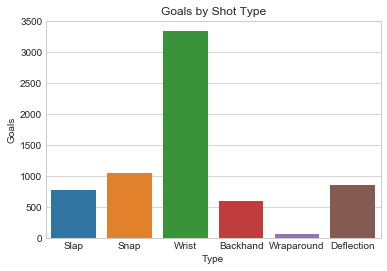

In [39]:
#Create a bar plot of Goals / Shots by Type
goal_type_plot = sns.barplot(x = "Type", y = "Goals", data = shot_analysis, ci = 0)
plt.title("Goals by Shot Type")
plt.show()

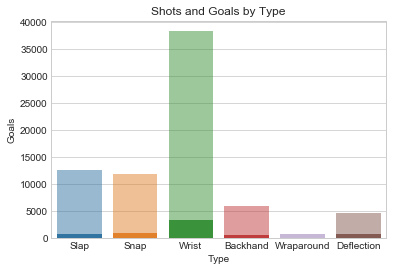

In [40]:
#Create a bar plot of Scoring Percentage by Type
shot_plot = sns.barplot(x = "Type", y = "Shots", data = shot_analysis, ci = 0, alpha = 0.5)
goal_plot = sns.barplot(x = "Type", y = "Goals", data = shot_analysis, ci = 0)
plt.title("Shots and Goals by Type")
plt.show()

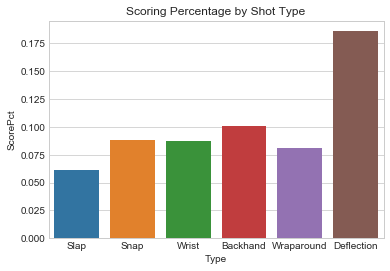

In [41]:
#Create a bar plot of Scoring Percentage by Type
#Scoring Percentage = # Goals / # Shots

# Scoring percentage show that deflections score at a noticably higher rate than the other shot types.
# This indicates that the last second direct change of the shot trajectory is very difficult for a goalie to stop.

score_pct_plot = sns.barplot(x = "Type", y = "ScorePct", data = shot_analysis, ci = 0)
plt.title("Scoring Percentage by Shot Type")
plt.show()